In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from cycler import cycler
import pandas as pd
import re

In [2]:
df = pd.read_csv('beer_by_state.csv')
df

,barrels_produced,breweries_per_capita,state,total_breweries,excise_tax
0,62738,0.9,Alabama,34,0.53
1,204302,6.8,Alaska,36,1.07
2,147728,1.9,Arizona,96,0.16
3,42294,1.6,Arkansas,35,0.23
4,3285525,2.6,California,764,0.20
5,1523204,8.4,Colorado,348,0.08
6,166848,2.2,Connecticut,60,0.24
7,292741,2.9,Delaware,21,0.26
8,33025,2.2,Dc,12,0.09
9,1408032,1.5,Florida,243,0.48


In [12]:
df.dtypes

barrels_produced          int64
breweries_per_capita    float64
state                    object
total_breweries           int64
excise_tax              float64
dtype: object

In [33]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

<Figure size 640x480 with 0 Axes>

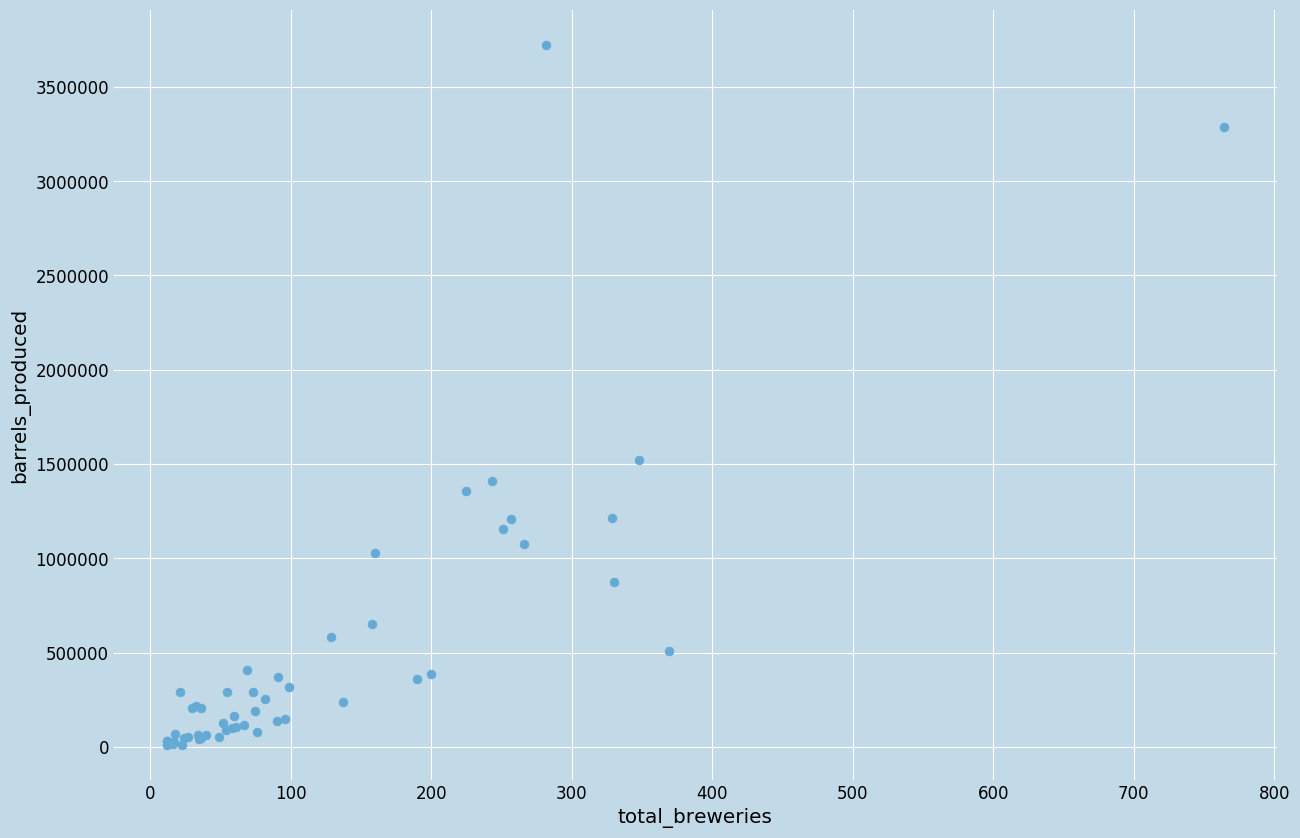

In [59]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax = df.plot(kind='scatter', x='total_breweries', y='barrels_produced', figsize=(15,10), s=40)
# CUSTOMIZATION CODE GOES UNDER HERE
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': '#c2d9e7',
    'font.size': 11.0,
    'axes.facecolor': '#c2d9e7',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': 'white',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#275876', '#64aad4', '#ec866c', '#87d8d6', '#7273a5', '#f9d669']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'font.family': 'Franklin Gothic Book',
})


plt.show()

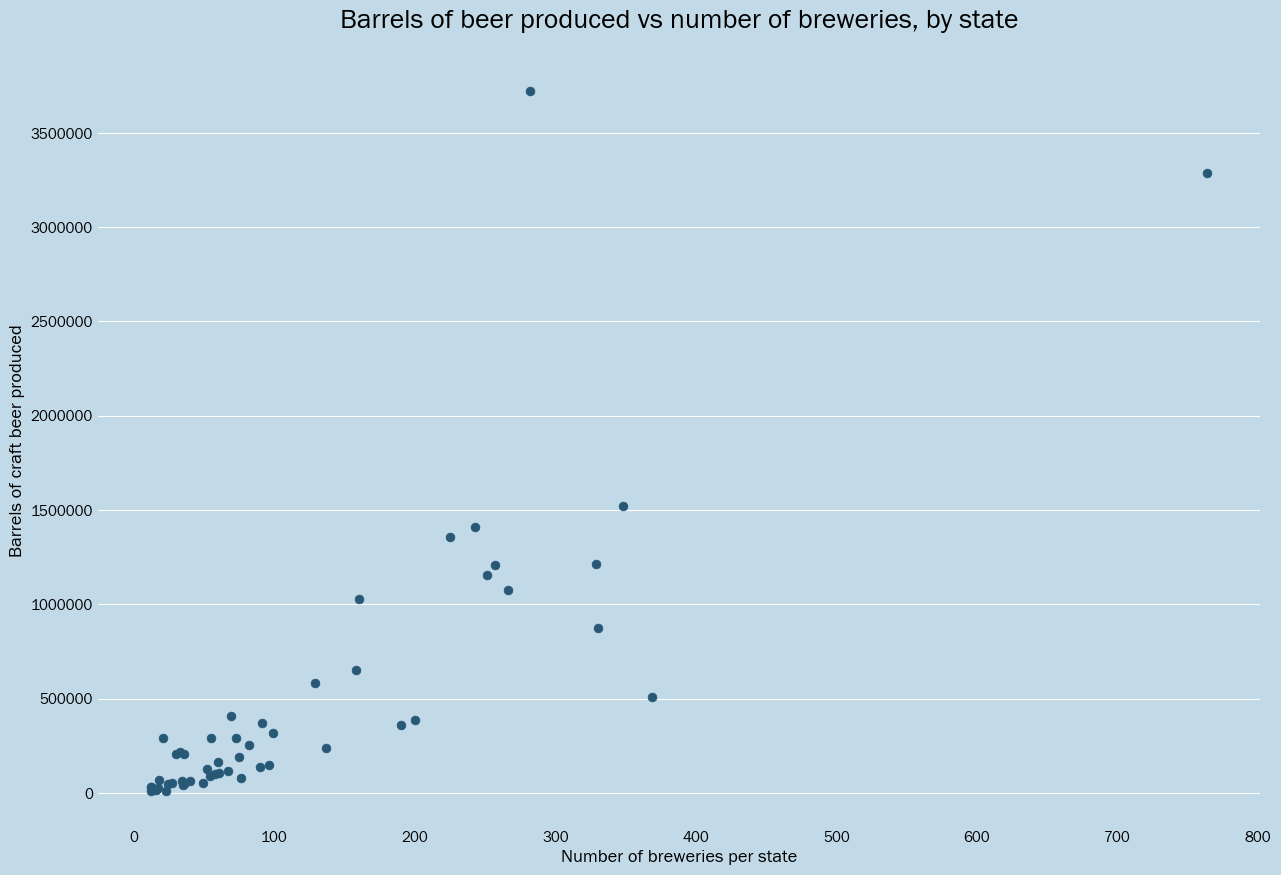

In [55]:
ax = df.plot(kind='scatter', x='total_breweries', y='barrels_produced', figsize=(15,10), s=40)
ax.set_title("Barrels of beer produced vs number of breweries, by state", pad=20)
ax.set_xlabel("Number of breweries per state")
ax.set_ylabel("Barrels of craft beer produced")
ax.title.set_fontsize(20)
ax.grid(False, axis='x')

plt.show()
plt.savefig("production_vs_number.pdf")

<Figure size 640x480 with 0 Axes>

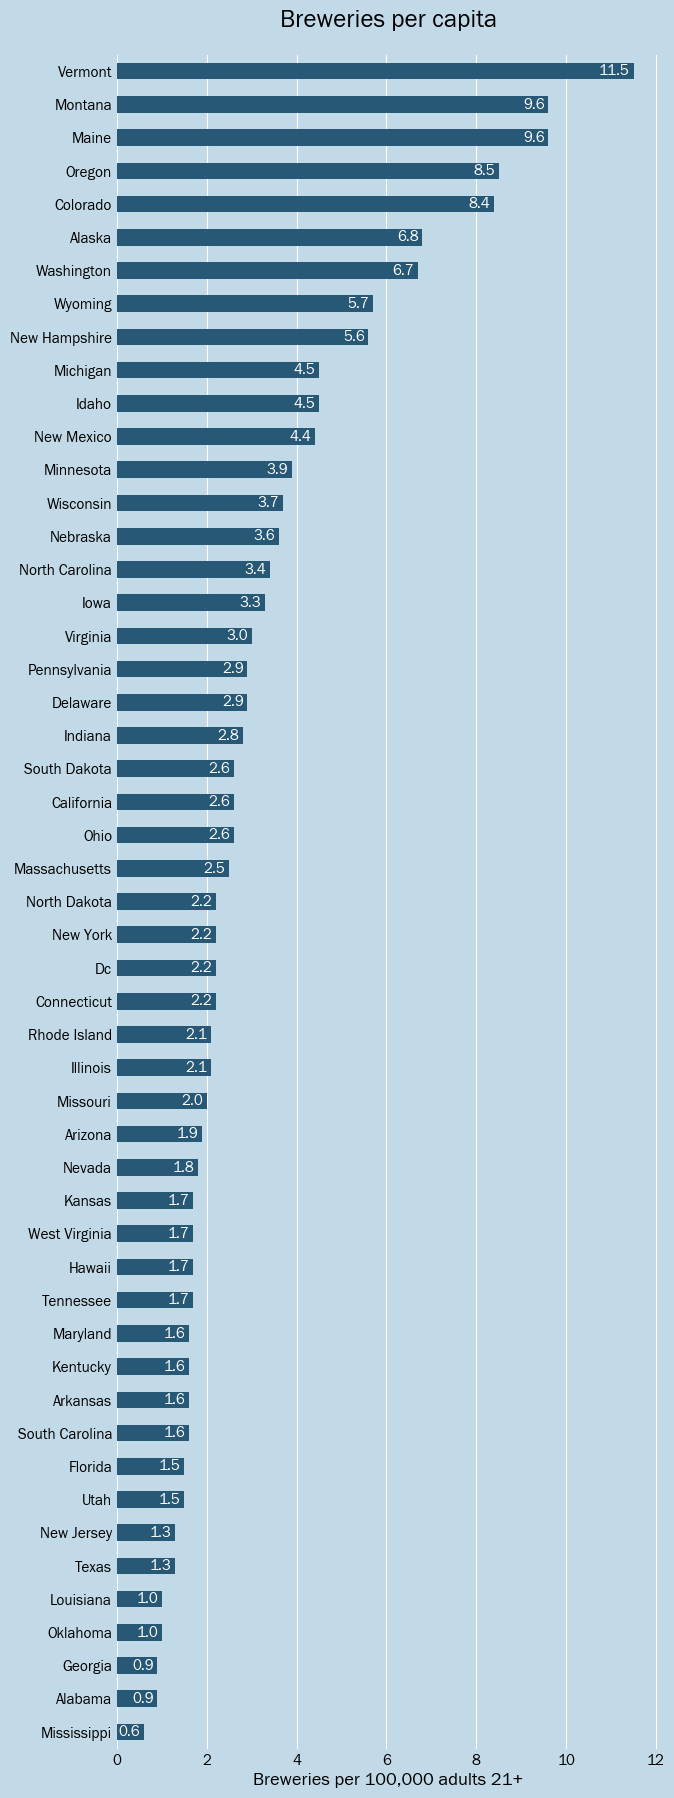

In [56]:
ax = df.sort_values(by=['breweries_per_capita']).plot(kind='barh', x='state', y='breweries_per_capita', figsize=(7,22), color='#275876', legend=False)
ax.set_title("Breweries per capita", pad=20)
ax.grid(False, axis='y')
ax.set_xlabel("Breweries per 100,000 adults 21+")
ax.set_ylabel('')
ax.title.set_fontsize(18)
y = df['breweries_per_capita']



# matplotlib counts from the bottom and builds up
for i, bar in enumerate(ax.patches):
    value = bar.get_width()
    x_pos = bar.get_width() - .08
    y_pos = i
#     ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')

plt.show()
plt.savefig('breweries_per_capita.pdf')

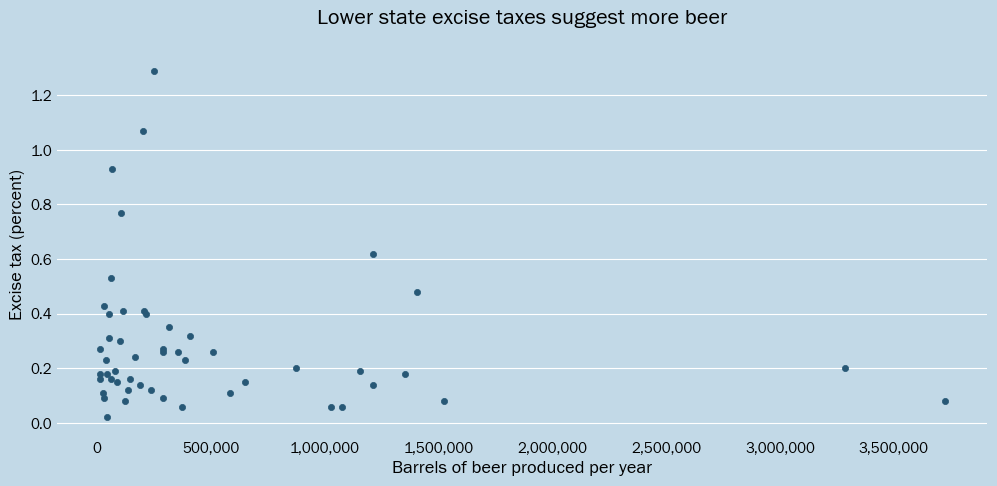

In [60]:
from matplotlib.ticker import FuncFormatter

# Step One: build a function
def with_commas(value, pos): 
    millions = value / 100000
    # if we were naming this, whatever we were naming it would go before the comma
    # kinda like this: return "{number,}".format(int(value))
    return "{:,}".format(int(value))
    # another way to do this
    # return "{} M".format(millions)

# Step Two: Use FuncFormatter with that function
# Unsure what this does, but it's a step
formatter = FuncFormatter(with_commas)

ax = df.plot(kind='scatter', x='barrels_produced', y='excise_tax', figsize=(12, 5))

ax.set_xlabel("Barrels of beer produced per year")
ax.set_ylabel("Excise tax (percent)")
ax.grid(False, axis='x')
ax.set_title("Lower state excise taxes suggest more beer", pad=20)
ax.title.set_fontsize(16)
ax.xaxis.set_major_formatter(formatter)
plt.show()
plt.savefig('excise_tax_vs_production.pdf')